# ToyBrain dataset tutorial:
# How to generate a ToyBrain dataset with a desired `image <--> covariates` relationship ?

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# standard python packages
import os, sys
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.image as mpimg
from sklearn import datasets, linear_model
from tqdm.notebook import tqdm
import random
import math
import json

from create_toybrains import ToyBrainsData
from utils.vizutils import *

## (Step 1) Create a configuration file
that contains, <br>
(a) the list of covariates and labels <br>
(b) the relationship between each covaraite and the image generation attributes <br><br>
The config can be stored in `configs/` folder as shown below:

In [3]:
! head -30 configs/base.py

head: cannot open 'configs/base.py' for reading: No such file or directory


### Check the configuration

In [4]:
toy = ToyBrainsData(base_config='configs.lbl5cov3_base.py')

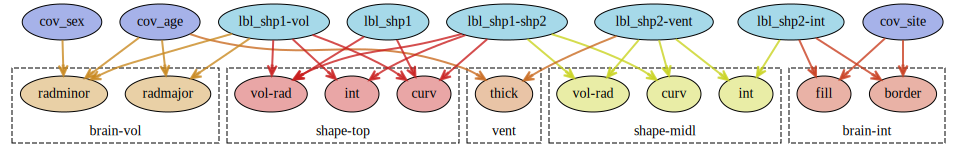

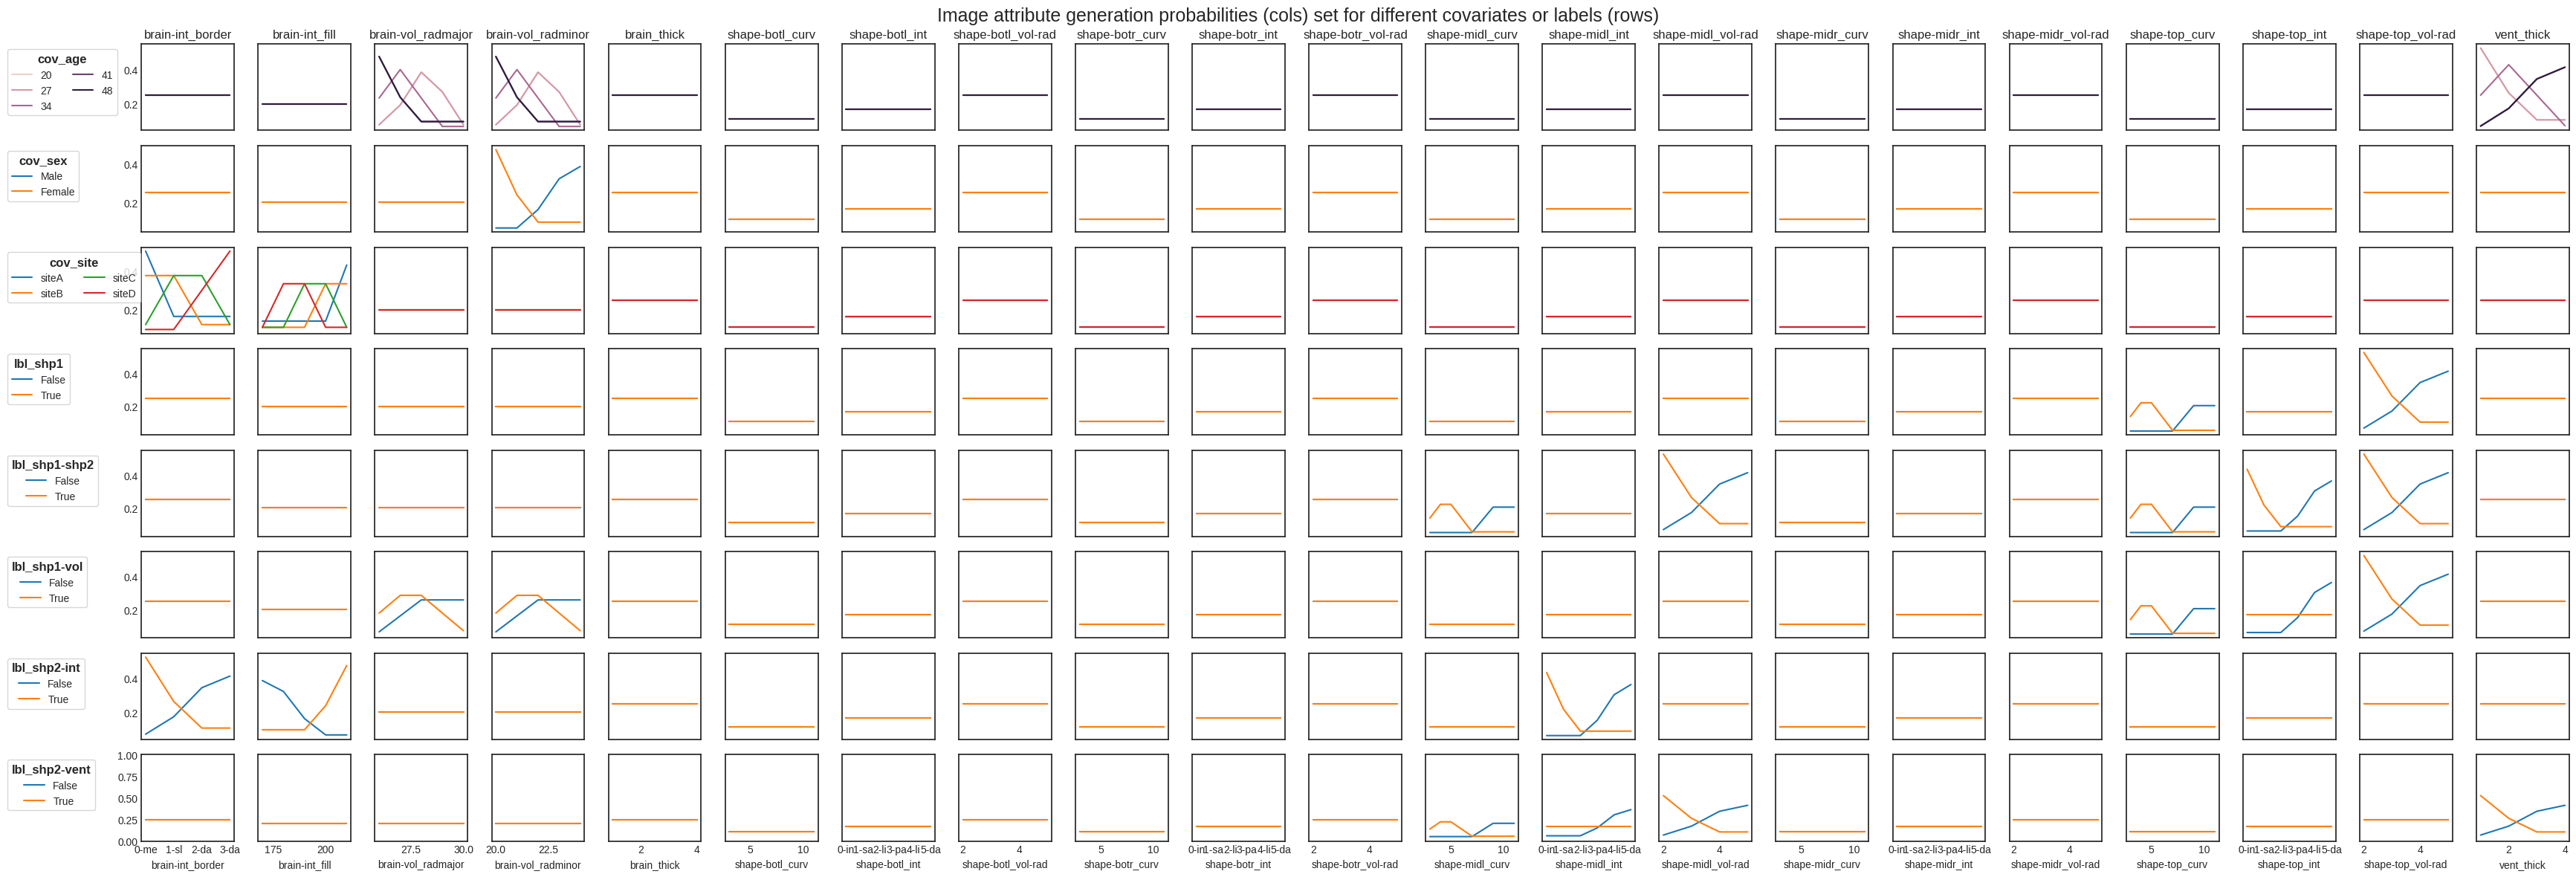

In [18]:
_ = toy.show_current_config() # also returns the nodes and connections of the causal graph

We can also add tweaks to a base config and check how this changes the relationships and probability distributions:

In [5]:
# add a tweaking config "lbl5cov3_tweak_highprobas.py" that will make the probability distributions 
# extremely distinct for all covariates AND it also creates a link between cov_site and shape-midl_int
toy_highprobas = ToyBrainsData(base_config='configs.lbl5cov3_base', 
                               tweak_config='configs.lbl5cov3_tweak_highprobas')

TODO: plot differences in the distributions instead @Jihoon

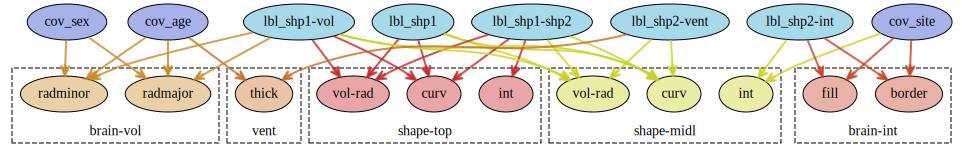

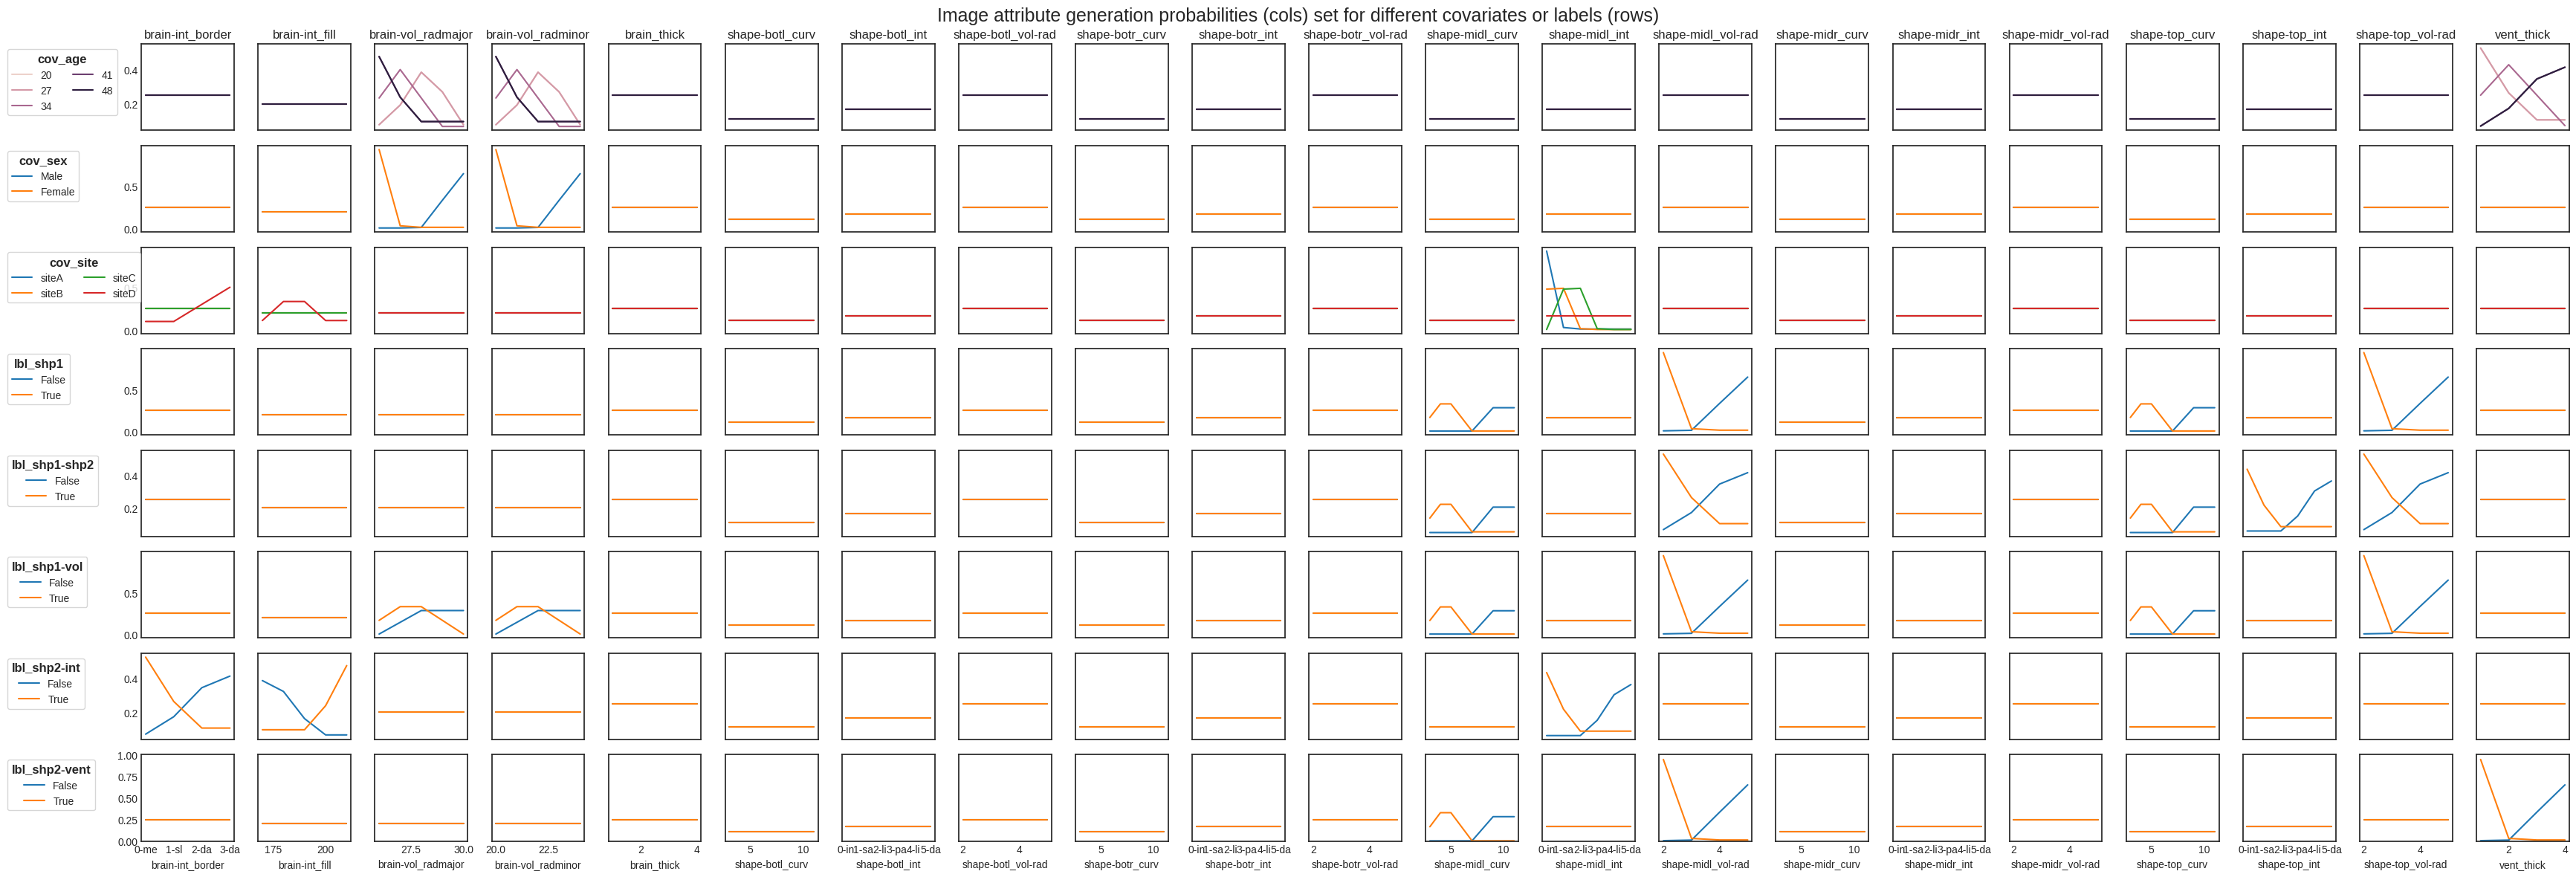

In [20]:
_ = toy_highprobas.show_current_config()

## (Step 2) Generate data table 
Sample the dataset and verify how the distributions will look. 
If some distribution isn't as expected then go back to step 1 and edit the config file accordingly.

In [6]:
df = toy.generate_dataset_table(n_samples=1000)

Generating 1000 synthetic toy brain images:


100%|██████████| 1000/1000 [00:04<00:00, 214.19it/s]


### Visualize the dataframe dist.

In [22]:
df

gen_brain-vol_radminor  gen_brain-vol_radmajor  gen_brain_thick  \
subjectID                                                                    
00000                        23.0                    28.0              1.0   
00001                        22.0                    30.0              1.0   
00002                        24.0                    28.0              2.0   
00003                        21.0                    29.0              4.0   
00004                        21.0                    30.0              3.0   
...                           ...                     ...              ...   
00995                        20.0                    28.0              1.0   
00996                        23.0                    27.0              2.0   
00997                        21.0                    28.0              3.0   
00998                        23.0                    29.0              2.0   
00999                        20.0                    28.0              3.0   

           gen_brain-int_fill gen_brain-int_border  gen_vent_thick  \
subjectID                                                            
00000                   190.0          1-slateblue             4.0   
00001                   200.0          1-slateblue             3.0   
00002                   180.0      2-darkslateblue             1.0   
00003                   210.0           3-darkblue             1.0   
00004                   170.0           3-darkblue             1.0   
...                       ...                  ...             ...   
00995                   190.0           3-darkblue             4.0   
00996                   210.0    0-mediumslateblue             1.0   
00997                   200.0    0-mediumslateblue             4.0   
00998                   170.0    0-mediumslateblue             4.0   
00999                   210.0          1-slateblue             4.0   

           gen_shape-top_curv gen_shape-top_int  _gen_shape-top_vol-rad  \
subjectID                                                                 
00000                     8.0       5-darkgreen                     4.0   
00001                    10.0      4-lightgreen                     4.0   
00002                     6.0   3-palegoldenrod                     2.0   
00003                     3.0       0-indianred                     2.0   
00004                     3.0   3-palegoldenrod                     5.0   
...                       ...               ...                     ...   
00995                     6.0   3-palegoldenrod                     5.0   
00996                     9.0       5-darkgreen                     5.0   
00997                     6.0      4-lightgreen                     2.0   
00998                     9.0       0-indianred                     5.0   
00999                    11.0       5-darkgreen                     2.0   

           gen_shape-midr_curv  ... lbl_shp1-shp2  lbl_shp1-vol  \
subjectID                       ...                               
00000                      7.0  ...          True         False   
00001                      4.0  ...         False         False   
00002                      4.0  ...         False          True   
00003                      4.0  ...          True          True   
00004                      6.0  ...         False         False   
...                        ...  ...           ...           ...   
00995                      6.0  ...         False          True   
00996                     11.0  ...         False         False   
00997                      3.0  ...         False          True   
00998                      5.0  ...          True         False   
00999                      9.0  ...         False          True   

           lbl_shp2-vent lbl_shp2-int  gen_brain-vol  gen_shape-top_vol  \
subjectID                                                                 
00000              False         True    2023.185669          48.983479   
00001       

#### (a) Viz image attributes vs covariates dist.

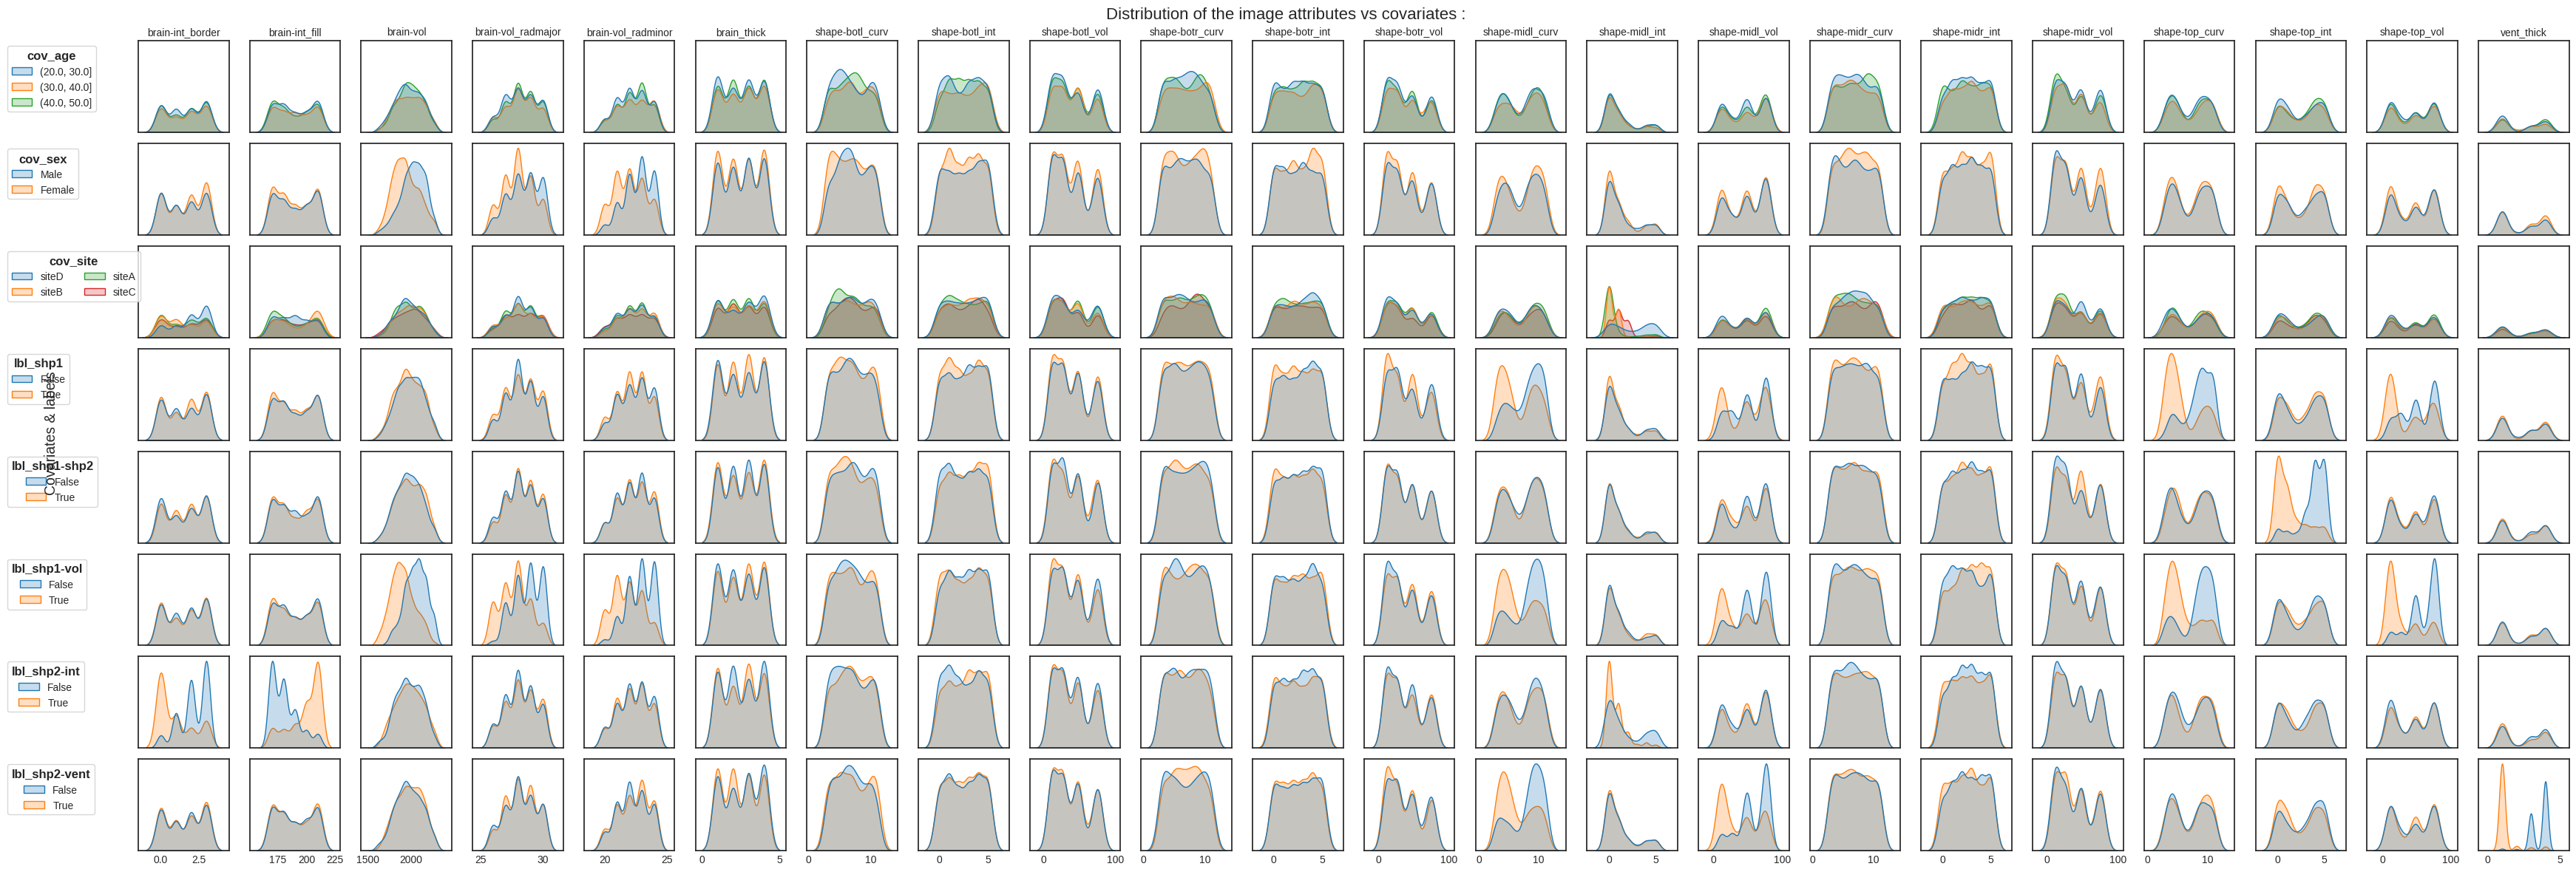

In [25]:
# get all column names starting with 'gen_'
plot_col_dists(df, attr_cols=df.filter(regex='^gen_').columns, cov_cols=df.filter(regex='^(cov_|lbl)').columns, 
               title="Distribution of the image attributes vs covariates :")
plt.show()

#### (b) Viz dist. of all variables in the dataset

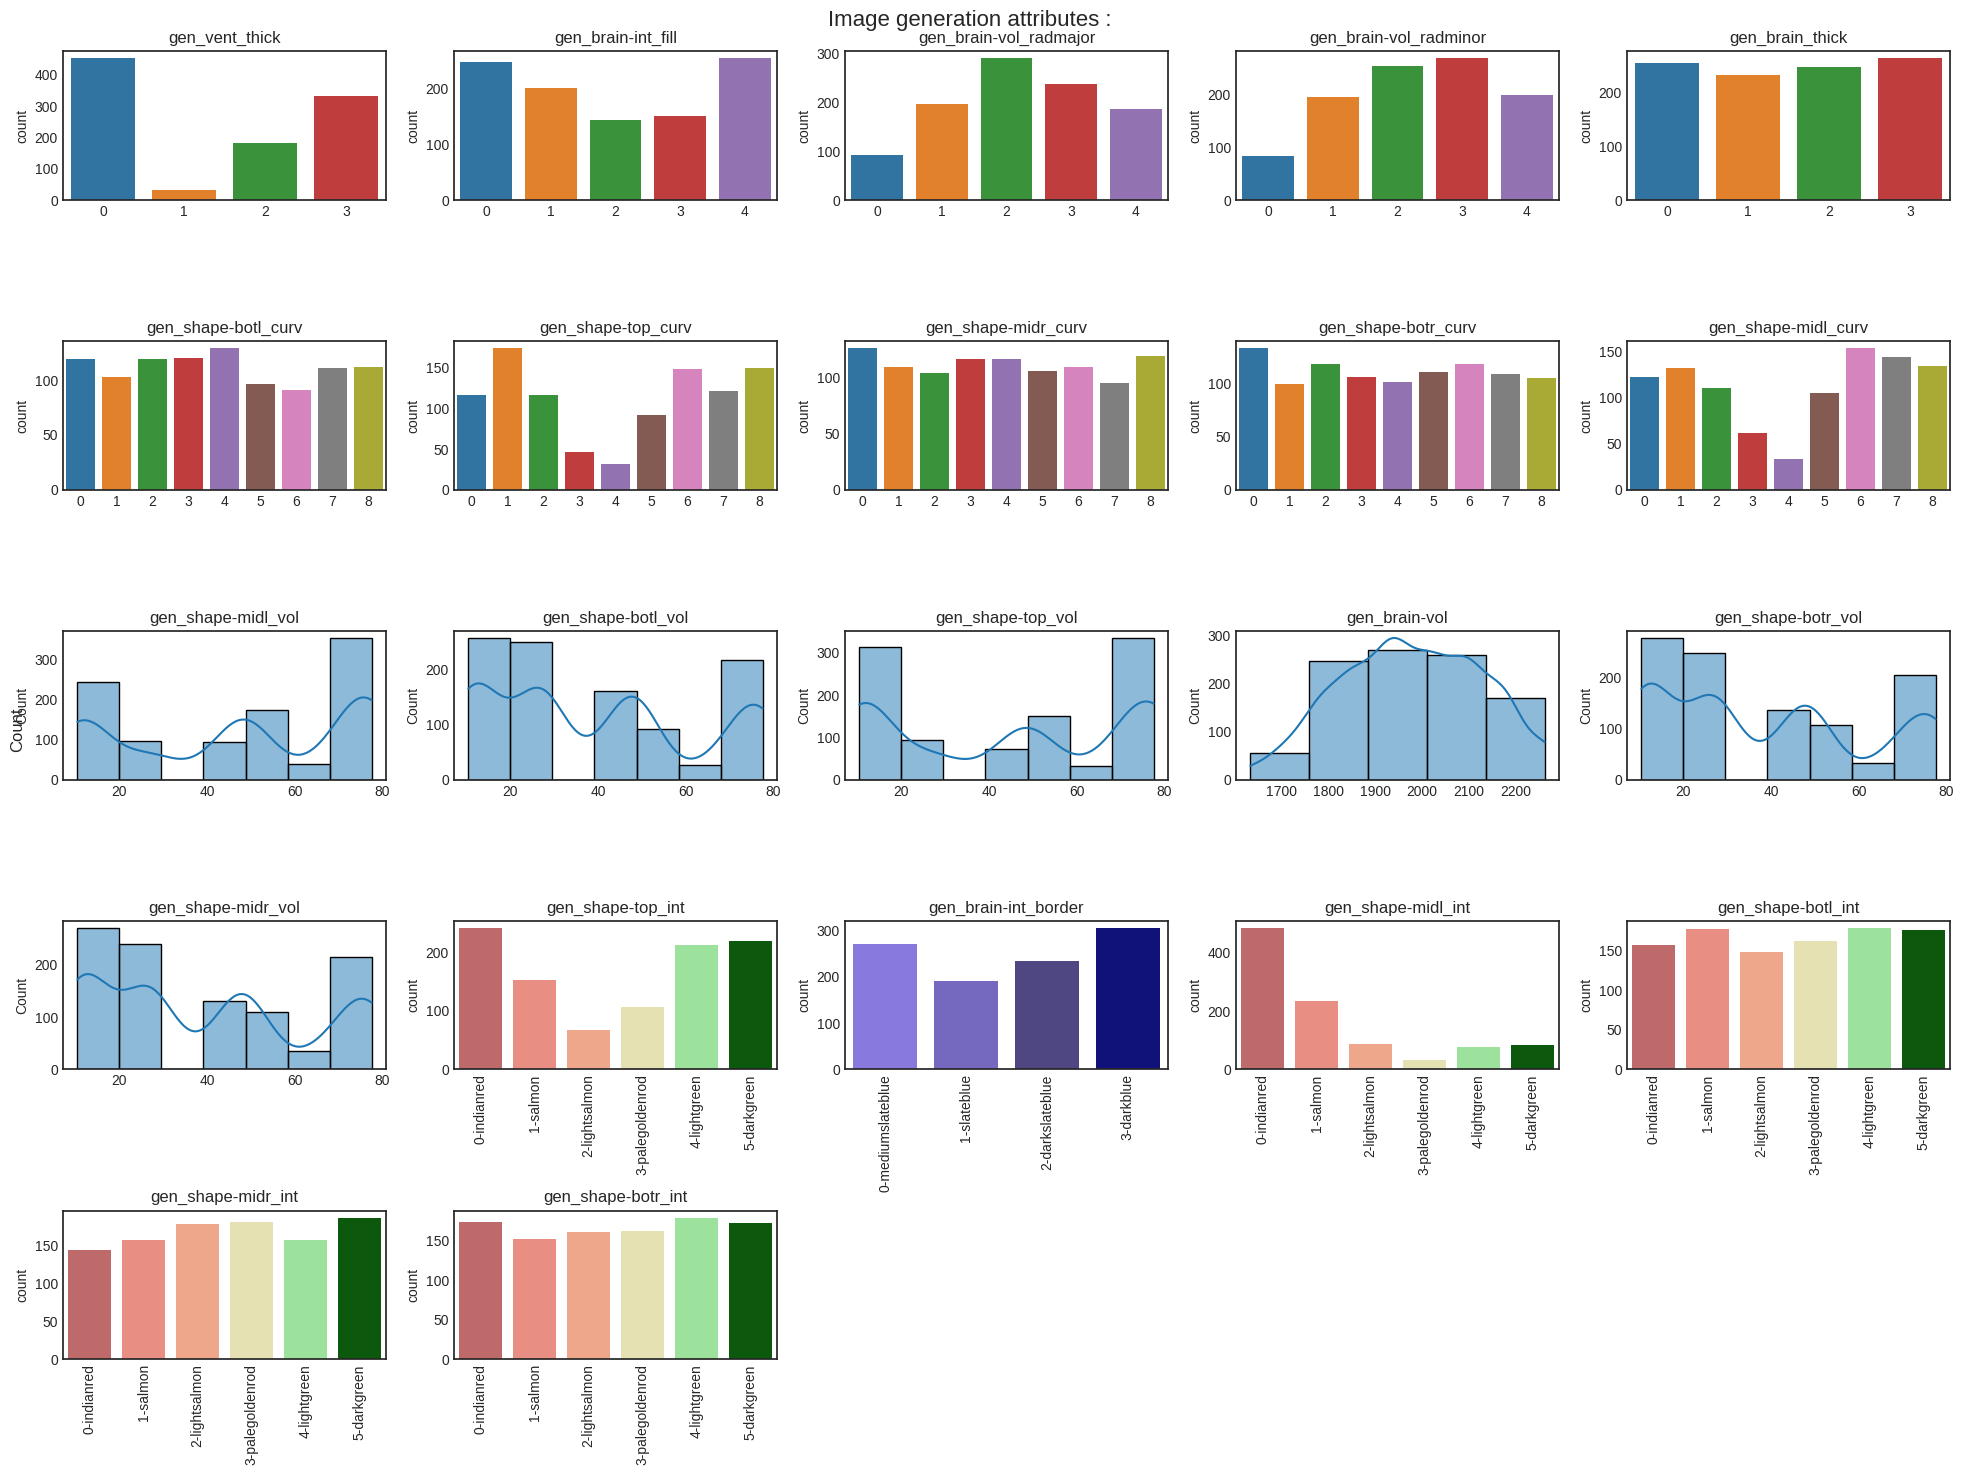

In [26]:
# get all column names starting with 'gen_'
plot_col_counts(df.filter(regex='^gen_'), title="Image generation attributes :")
plt.show()

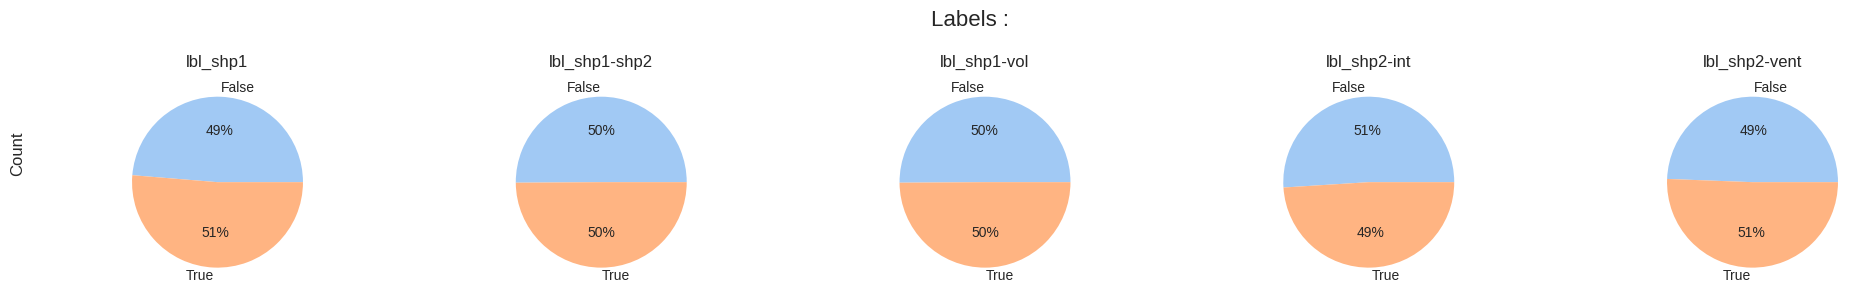

In [27]:
# get all column names starting with 'gen_'
plot_col_counts(df.filter(regex='^lbl'), title="Labels :")
plt.show()

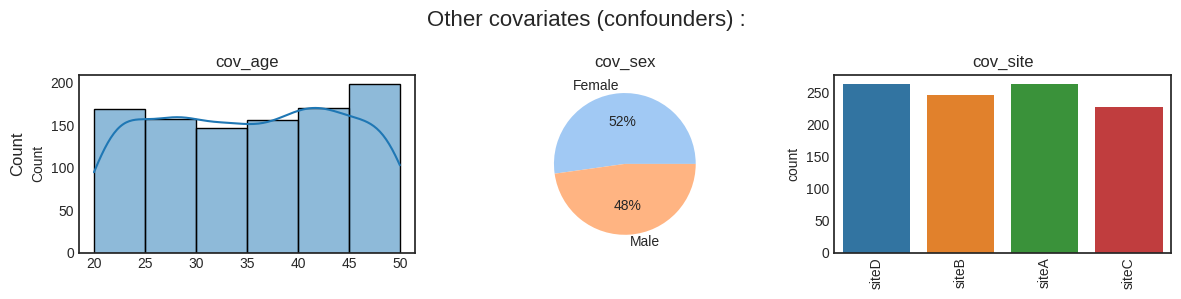

In [28]:
# get all column names starting with 'gen_'
plot_col_counts(df.filter(regex='^cov_'), title="Other covariates (confounders) :")
plt.show()

### Compare with the another config

In [7]:
df_highprobas = toy_highprobas.generate_dataset_table(n_samples=1000)

Generating 1000 synthetic toy brain images:


100%|██████████| 1000/1000 [00:04<00:00, 207.94it/s]


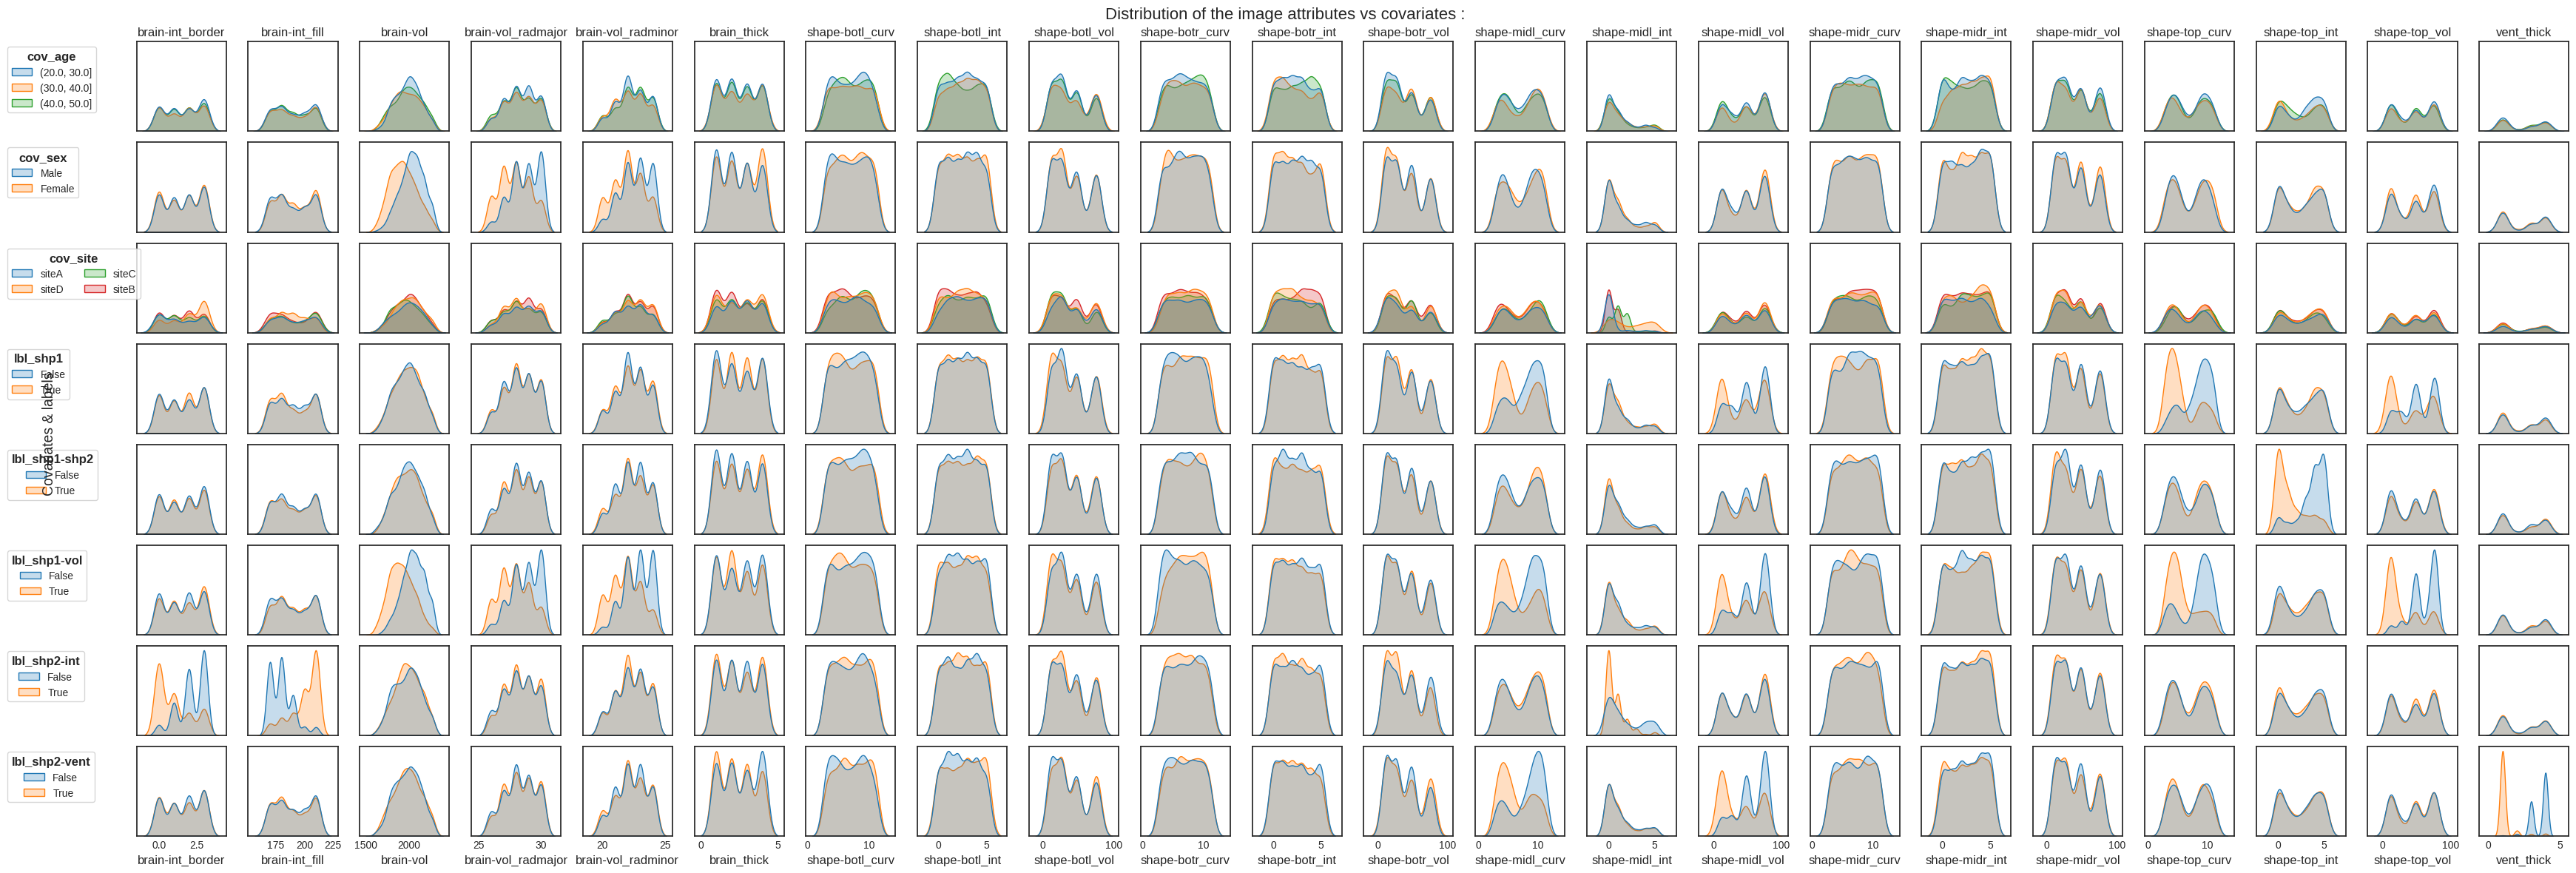

In [34]:
plot_col_dists(df_highprobas, 
               attr_cols=df_highprobas.filter(regex='^gen_').columns, 
               cov_cols=df_highprobas.filter(regex='^(cov_|lbl)').columns, 
               title="Distribution of the image attributes vs covariates :")
plt.show()

## (Step 3) Baseline prediction accuracies
Fit a logistic regression model to predict all labels and covariates from image attributes. <br>
This shows a ground-truth upper bound for the dataset. <br>

In [41]:
from utils.baseline import run_baseline, results_summary, viz_baseline
out_dir = f"results/{toy.OUT_DIR_SUF.split('/')[-1]}"

df_results = run_baseline(DATA_DIR=toy.OUT_DIR_SUF, 
                         OUT_DIR=out_dir)

running a total of 240 different settings of [input features] x [output labels] x [cross validation]


  0%|          | 0/240 [00:00<?, ?it/s]

TOTAL RUNTIME: 0:00:39


In [42]:
results_summary(df_results)

/ritter/roshan/workspace/toybrains/utils/baseline.py:268: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ('test_metric', 'mean'), ('test_metric', 'std'), ('test_metric', 'min'), ('test_metric', 'max')]]


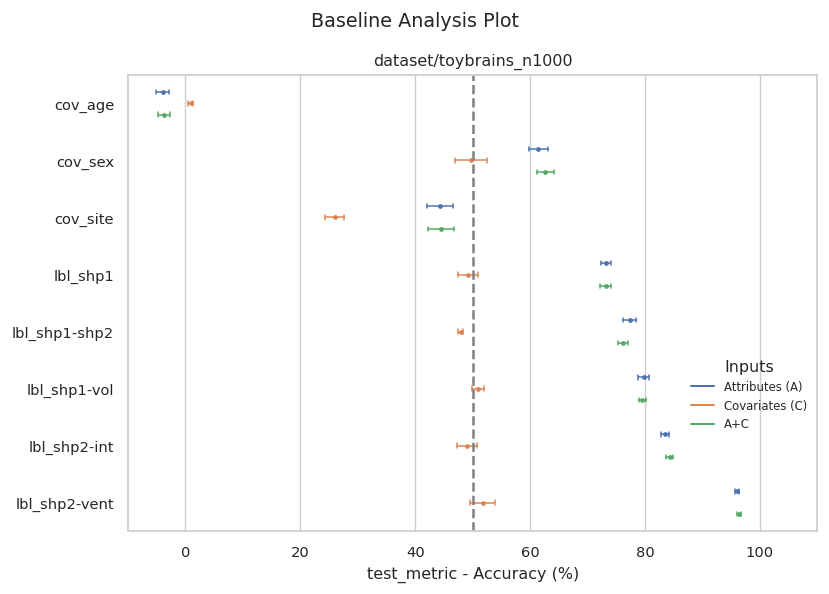

In [49]:
viz_baseline(df_results)

Compare with the other dataset

In [51]:
out_dir = f"results/{toy_highprobas.OUT_DIR_SUF.split('/')[-1]}"

df_results_highprobas = run_baseline(DATA_DIR=toy_highprobas.OUT_DIR_SUF, 
                         OUT_DIR=out_dir)

running a total of 240 different settings of [input features] x [output labels] x [cross validation]


  0%|          | 0/240 [00:00<?, ?it/s]

TOTAL RUNTIME: 0:00:44


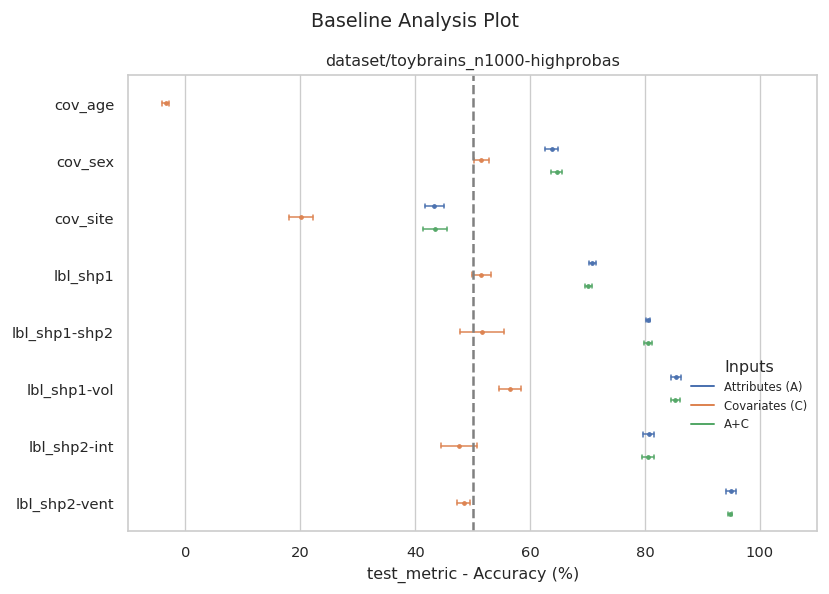

In [52]:
viz_baseline(df_results_highprobas)

## (Step 4) Generate full dataset (with images)

In [50]:
toy.generate_dataset_images(n_jobs=10)

Generating n=1000 toybrain images


  0%|          | 0/1000 [00:00<?, ?it/s]

Visualize some of the generated images

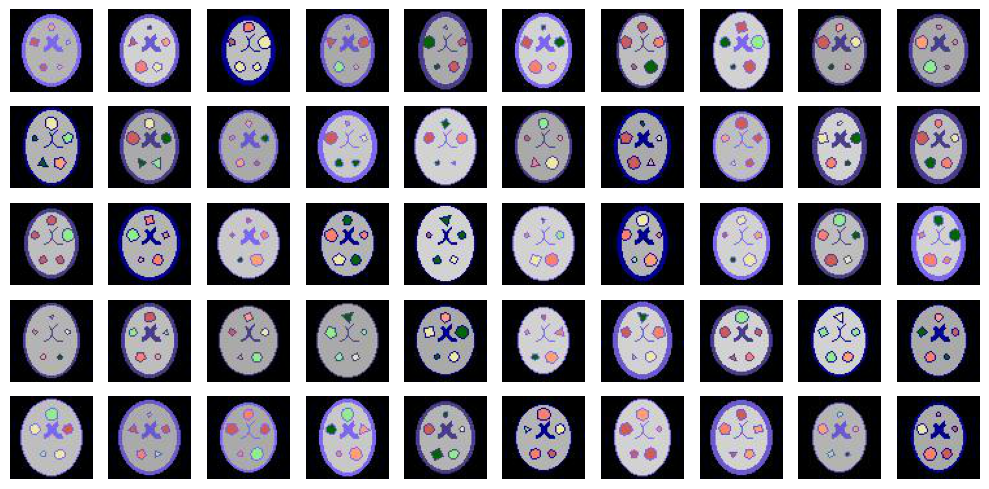

In [10]:
DATA_DIR = toy.OUT_DIR_SUF
img_files = sorted(glob(f"{DATA_DIR}/images/*.jpg"))
show_images(img_files=img_files, n_rows=5)

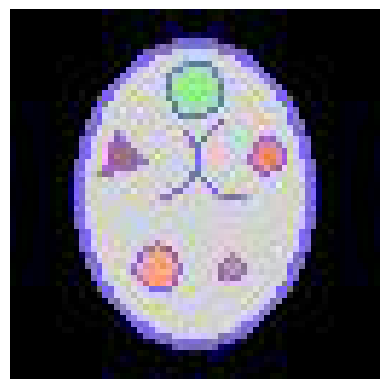

In [11]:
# one random image in detail
img_file = np.random.choice(img_files)
img = mpimg.imread(img_file)
f = plt.figure(frameon=False)
plt.imshow(img)
plt.axis('off')
# plt.savefig("docs/brain.png", bbox_inches='tight')
plt.show()

also generate for the second config

In [9]:
toy_highprobas.generate_dataset_images(outdir_suffix='n-highprobas') 

100%|██████████| 1000/1000 [00:18<00:00, 53.11it/s]


## Step 2 & 3 can be run together
with 
```python 
toy.generate_dataset(n_samples=1000)
```
that internally calls
```python 
toy.generate_dataset_table(n_samples=1000)
toy.generate_dataset_images()
```

Alternatively, toybrains dataset can be generated from the command line directly as follows:

In [14]:
# generating 100 samples with debug switch turned on
! python3 create_toybrains.py -c configs.lbl5cov3_base -n 100 -d 

Generative parameter        |        States 
------------------------------------------------------------
brain-vol_radminor         [20 21 22 23 24]
brain-vol_radmajor         [26 27 28 29 30]
brain_thick                [1 2 3 4]
brain-int_fill             [210 200 190 180 170]
brain-int_border           ['0-mediumslateblue' '1-slateblue' '2-darkslateblue' '3-darkblue']
vent_thick                 [1 2 3 4]
shape-top_curv             [ 3  4  5  6  7  8  9 10 11]
shape-top_int              ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkgreen']
shape-top_vol-rad          [2 3 4 5]
shape-midr_curv            [ 3  4  5  6  7  8  9 10 11]
shape-midr_int             ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkgreen']
shape-midr_vol-rad         [2 3 4 5]
shape-midl_curv            [ 3  4  5  6  7  8  9 10 11]
shape-midl_int             ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkg